# What is crystal structure

1. Whatch the video: [Video](https://youtu.be/3W1QA26RZtU)
2. Answer the questions:
   - Where do we see crystal structures in real life?
   - The crystal structure of which substance is shown in the video?
   - What are differences between water molecule and ice?
   - What is crystal structure?

# How to describe crystal structure

[Периодические граничные](https://en.wikipedia.org/wiki/Periodic_boundary_conditions) условия описываются следующим образом:

Пусть бесконечная периодическая структура задана векторами трансляции $\vec{a}$, $\vec{b}$, $\vec{c}$ и точкой $r$.

Тогда произвольную точку $r'$ данной структуру можно описать выражением:

$ r' = r + n_1\vec{a} + n_2\vec{b} + n_3\vec{c}, $

где $n_1$, $n_2$, $n_3$ - произвольные целые числа.

Для того, чтобы рассмотреть примеры нам понадобятся 4 библиотеки:

In [1]:
import pandas as pd
import numpy as np
from itertools import product, combinations, permutations, combinations_with_replacement
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Одномерный случай

В одномерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен одним числом $n$ и одним вектором $\vec{a}$,

и приобретает вид:

$T = n*\vec{a}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого одномерного случая:

$ r' = r + n\vec{a}, $ 
- где $n$ - любое произвольное число

Зададим периодические граничные условия, описывающее любую точку рассматриваемого пространства и 

поместим объект - материальную точку $r$ с координатой $[0]$ - в структуру, заданую вектором трансляции $T = [1]$ ($\vec{a} = [1]$).

Зададим `x = 0` в точке пространства, определяемой числом `n = 0` (трансляция точки в себя)

In [2]:
# Translation vector a
a =np.array([1])

# Coordinate of defined point (1 dimentional)
r = np.array([0])

# Structural scaling factors
n = [0]

Значение функции описывающей периодические граничные условия:

`r_prime = r + n*a`

зависит только от задаваемой точки $r$, набора трансляций $n$ и вектора трансляции $\vec{a}$ 

In [3]:
def plot_1dim(a,r,n):
    # Periodic Boundary Conditions (PBC)
    r_prime = r + n*a
    
    # Plotting params without any physical information    
    fig, ax = plt.subplots(figsize=(5, 1))
    y = [0]*len(r_prime)
    plt.plot(r_prime,y, 'o')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.show()

Построим:

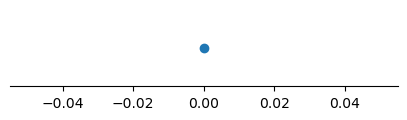

In [4]:
plot_1dim(a,r,n)

Зададим последовательность чисел n которая определит несклько точек $r`$:

In [5]:
n = np.arange(-5, 5, 1)

Набор чисел n: [-5 -4 -3 -2 -1  0  1  2  3  4]


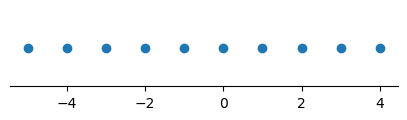

In [6]:
print(f'Набор чисел n: {n}')
plot_1dim(a,r,n)

Пусть любое число $n_i$ из набора чисел $n$ описывается выражением $n_i=n_{i-1}+1$, для всех $n\in{Z}$ (по определению),

тогда, если бы указанное выражение, описывало кристаллическую структуру, то получено описание бесконечной периодической структуры:

Вектор трансляции: `a = [1]`, с координатами едиственно описанного вида атомов, в базисе {a}: `r=[0]`


## Двумерный случай

В двумерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен двумя числами $n$ и двумя векторами $\vec{a}$ и $\vec{b}$.

Базис приобретает вид:

$T = n_1*\vec{a} + n_2*\vec{b}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **двумерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} $ 
- где $n_i$ - любое произвольное число

Зададим структуру множествами чисел `n_1` и `n_2` в базисе векторов трансляции `a = np.array([1,0])` и `b = np.array([0,1])`

и зададим единственный вид условных атомов точкой `r = 0`

In [2]:
# Translation vectors a,b
a = np.array([1,0])
b = np.array([0,1])

# Coordinate of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(-5, 5, 1)
n_2 = np.arange(-5, 5, 1)

Определим функцию для построения двумерной структуры:

In [3]:
def get_xy(a, b, r, n_1, n_2):
    xes, ycs = [], []
    for n in product(n_1, n_2, repeat=1):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n[0]*a + n[1]*b
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
    return xes, ycs   

Построим полученный набор точек:

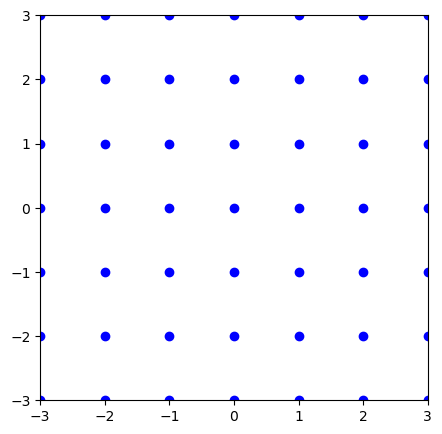

In [4]:
xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.xlim(-3,3) ; plt.ylim(-3,3)
plt.show()

# Описание периодических структур

## Описание центрированной структуры

Более сложная центрированная структура всё ещё с одним типом атомов:

In [5]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translation sets
n_1 = np.arange(-4, 4, 1)
n_2 = np.arange(-4, 4, 1)

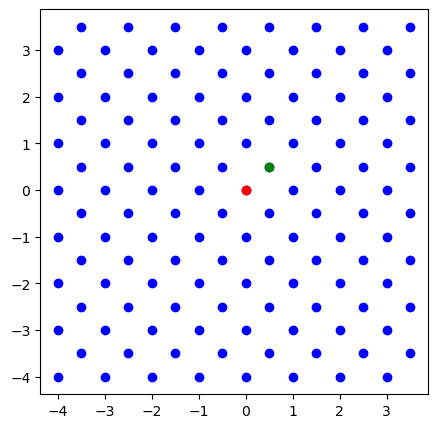

In [6]:
xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'bo')

# Original points
plt.plot([r_1[0]],[r_1[1]], 'ro')
plt.plot([r_2[0]],[r_2[1]], 'go')

plt.show()

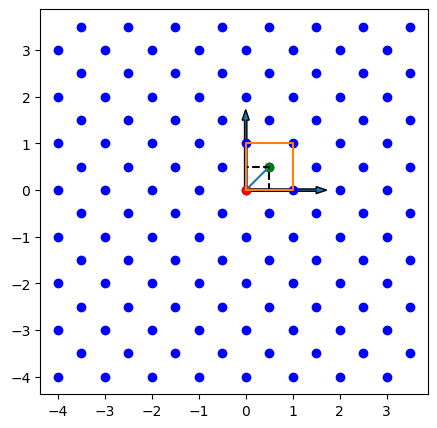

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

# All obtained points
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'bo')

# Original points
plt.plot([r_1[0]],[r_1[1]], 'ro')
plt.plot([r_2[0]],[r_2[1]], 'go')

# Periodic set
fx_set = [r_1[0], r_2[0]] 
fy_set = [r_1[1], r_2[1]]
plt.plot(fx_set, fy_set)

# Periodic cell boundaries
px_set = [r_1[0], r_1[0]+a[0]/2, r_1[0]+a[0]/2, r_1[0], r_1[0]]
py_set = [r_1[1], r_1[1]+b[0]/2, r_1[1]+b[1]/2, r_1[0]+b[1]/2, r_1[1]]
plt.plot(px_set, py_set, 'k--')

# Conventional cell boundaries
cx_set = [r_1[0], r_1[0]+a[0], r_1[0]+a[0], r_1[0] + b[0], r_1[0]]
cy_set = [r_1[1], r_1[1]+b[0], r_1[1]+b[1], r_1[0] + b[1], r_1[1]]
plt.plot(cx_set, cy_set)

# Translation vectors
plt.arrow(r_1[0], r_1[1], a[0]*1.5, a[1]*1.5, width=0.05)
plt.arrow(r_1[0], r_1[1], b[0]*1.5, b[1]*1.5, width=0.05)

plt.show()

## Двойственность описания структур

Зададим структуру

In [8]:
# Translation vectors a,b
a = np.array([0.5,0.5])
b = np.array([0,1])

# Coordinates of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(-8, 8, 1)
n_2 = np.arange(-8, 8, 1)

Вычислим координаты полученные трансляцией

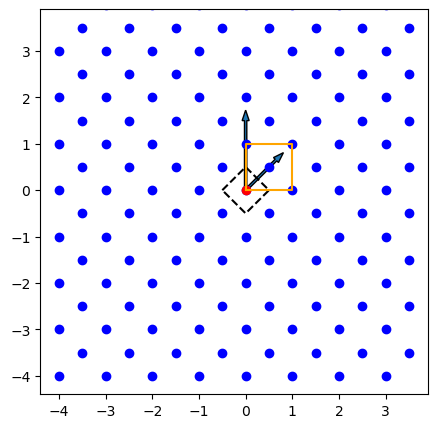

In [9]:
# Get points
xes, ycs = get_xy(a, b, r, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))

# All obtained points
plt.plot(xes, ycs, 'bo')

# Original point
plt.plot([r[0]],[r_1[1]], 'ro')

# Periodic cell boundaries
px_set = [r[0]-a[0],r[0],      r[0]+a[0], r[0]     , r[0]-a[0]]
py_set = [r[1],     r[1]+a[1], r[1],      r[1]-a[1], r[1]]
plt.plot(px_set, py_set, 'k--')

# Conventional cell
cx_set = [r[0], r[0]+a[0]*2, r[0]+a[0]*2, r[0] + b[0], r[0]]
cy_set = [r[1], r[1]+b[0]*2, r[1]+b[1], r[0] + b[1], r[1]]
plt.plot(cx_set, cy_set, '-', c='orange')

# Translation vectors
plt.arrow(r[0],r[1],a[0]*1.3,a[1]*1.3, width=0.05)
plt.arrow(r[0],r[1],b[0]*1.5,b[1]*1.5, width=0.05)

plt.xlim(-4.4,3.9) ; plt.ylim(-4.4,3.9)
plt.show()

## Несколько сортов атомов

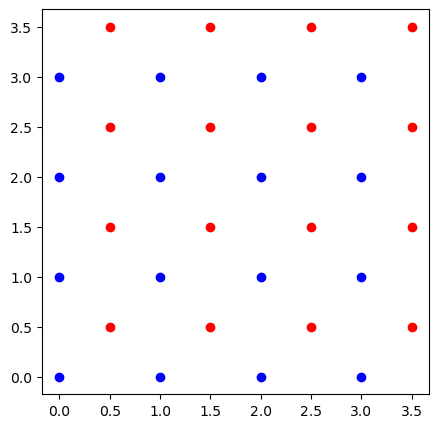

In [10]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translations sets
n_1 = np.arange(0, 4, 1)
n_2 = np.arange(0, 4, 1)

xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'ro')
plt.show()

---

## Трехмерный случай, с использованием формата записи, аналогичного `POSCAR`:

В формате POSCAR (VASP) вводится так называемый 'scale factor' `s`, который позволяет более явно визуально отразить соотношения векторов трансляции.

При этом наборы трансляций в реальности не нужны (объясняется ниже).

In [12]:
# scale factor
s = 1

# translations vectors
a = np.array([1.0, 0.0, 0.0])
b = np.array([0.0, 1.0, 0.0])
c = np.array([0.0, 0.0, 1.0])

# points' coordinates
r_1 =  np.array([0.0, 0.0, 0.0])
r_2 =  np.array([0.5, 0.5, 0.5])

# translations sets
n_1 = n_2 = n_3 = np.arange(-3, 4, 1)

В трёхмерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен всеми тремя числами $n$ и всеми тремя векторами $\vec{a}$, $\vec{b}$ и $\vec{c}$.

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **трёхмерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} + n_3*\vec{c} $ 
- где $n_i$ - любое произвольное число

Определим соответствующую функцию для нахождения координат каждого атома в рассматриваемой структуре:

In [13]:
def get_xyz(s, a, b, c, r, ns):
    xes, ycs, zds = [], [], []
    for n_i in combinations_with_replacement(n_1, 3):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n_i[0]*s*a + n_i[1]*s*b + n_i[2]*s*c
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
        zds.append(r_prime[2])
    return xes, ycs, zds

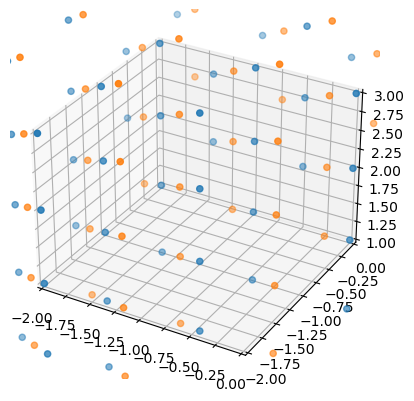

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for r in r_1, r_2:
    xes, ycs, zds = get_xyz(s, a, b, c, r, n_1)
    ax.scatter(xes, ycs, zds)
    plt.xlim(-2,0) ; plt.ylim(-2,0) ; ax.set_zlim(1,3)
plt.show()

# **Практическая работа №1**
**Работа с базами данных материалов**

# What is Machine Learning

# What properties we can predict

# My first ML-model for crystal properites prediction

# Individual task: Design a New Material